In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data=pd.read_csv("bankloan.csv")
data.head(5)

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [19]:
print(data.describe())

                ID          Age   Experience       Income      ZIP.Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal.Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000  

In [20]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

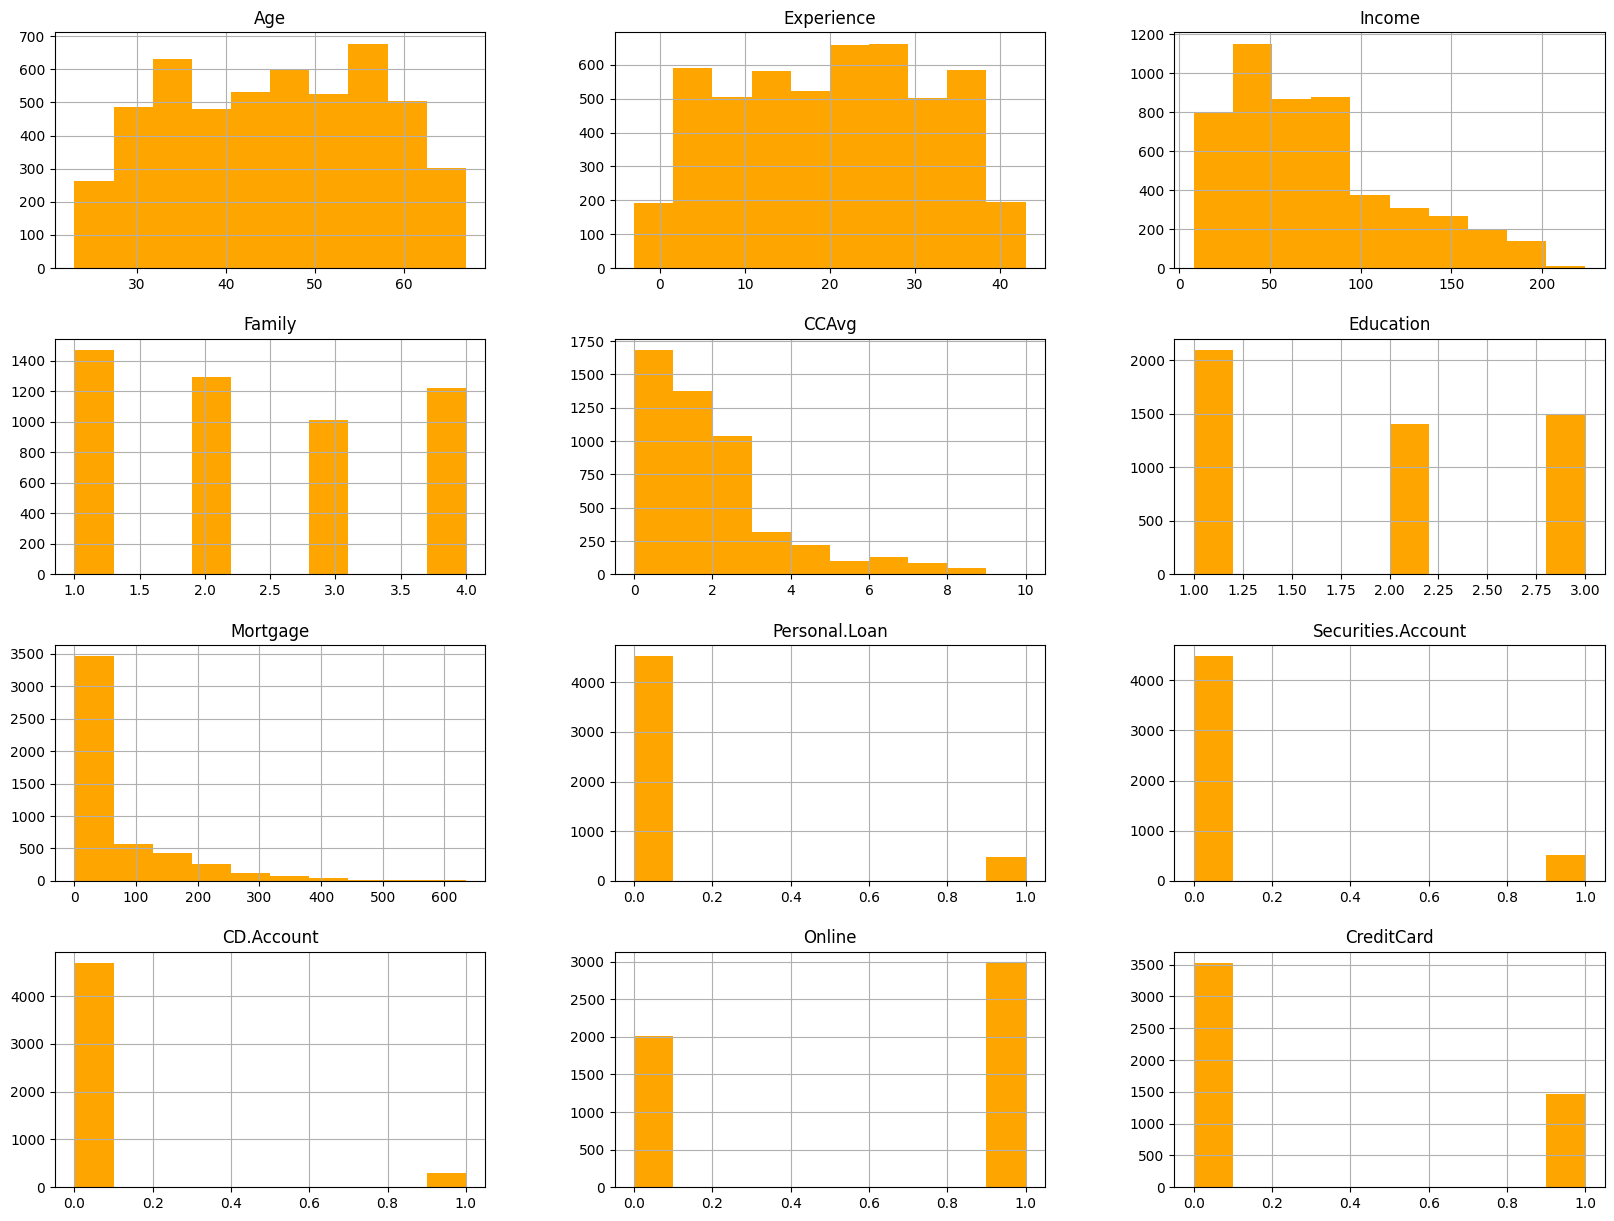

In [21]:
data=data.drop(["ID"],axis=1)
data=data.drop(["ZIP.Code"],axis=1)
data.hist(figsize=(20,15),color="orange")
plt.show()

<Axes: >

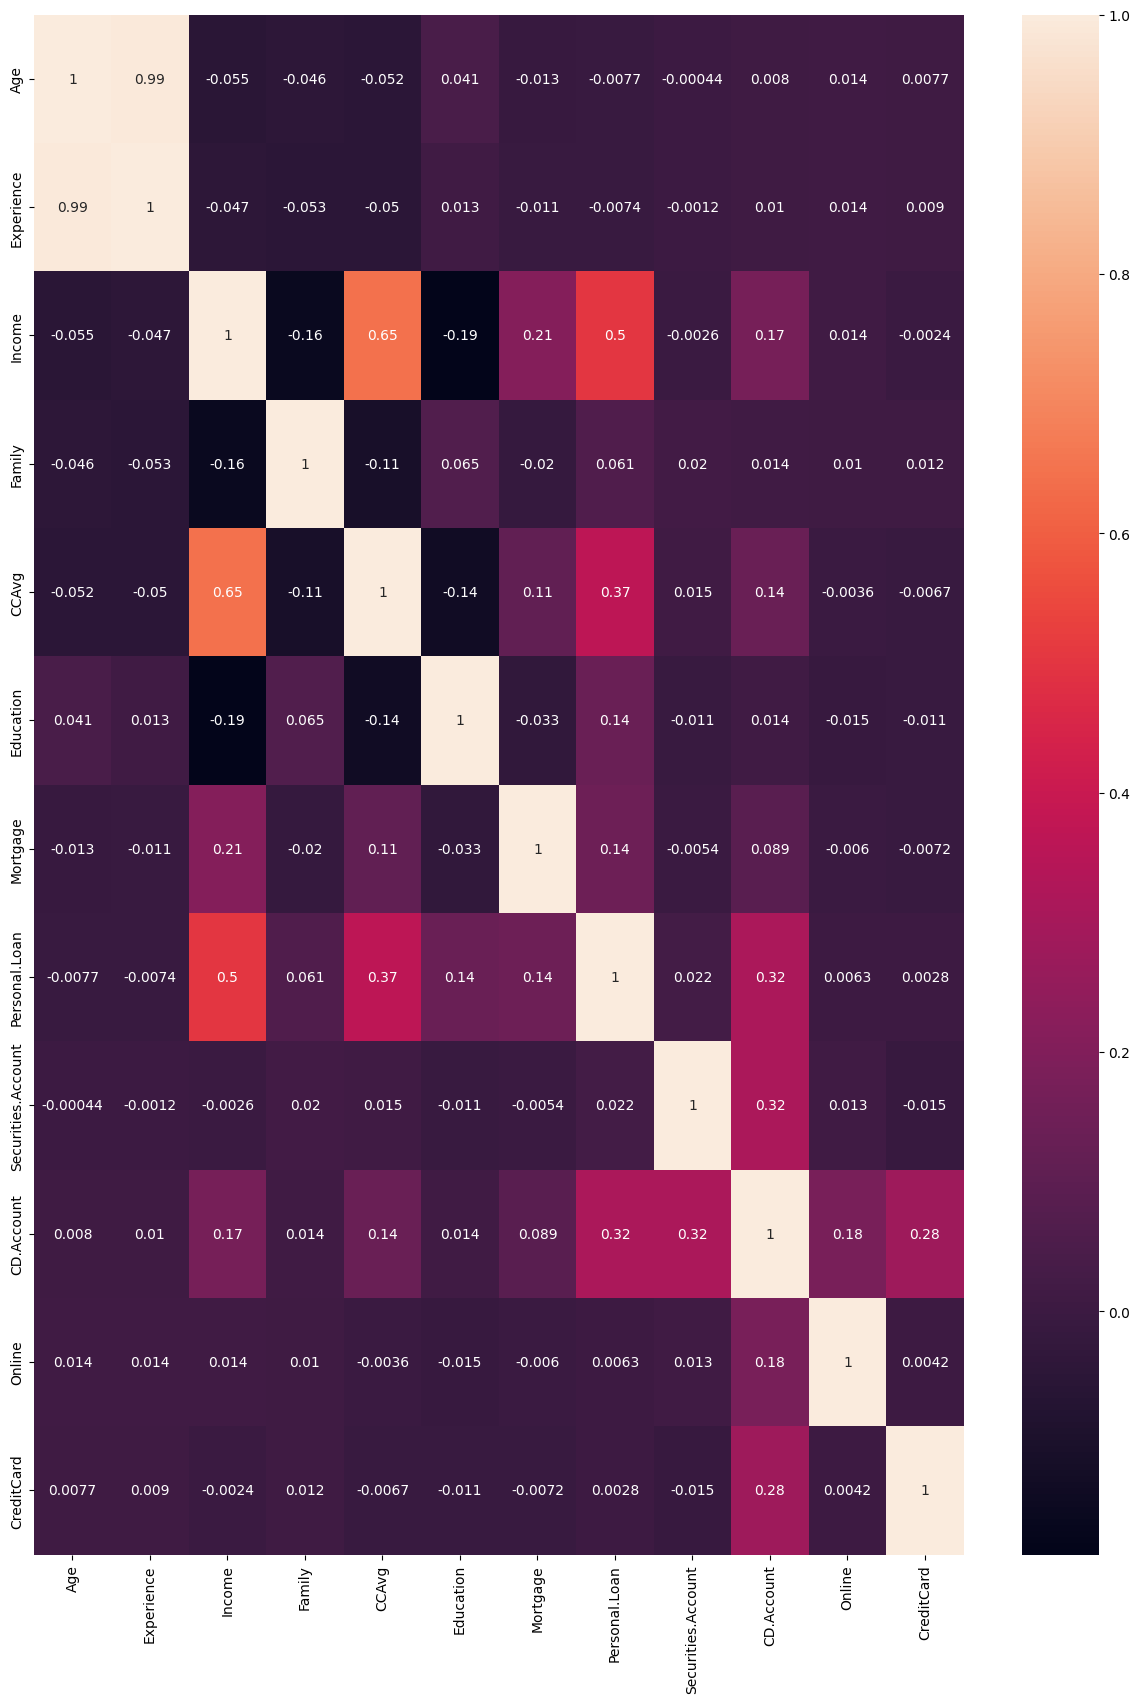

In [22]:
plt.figure(figsize=(15,20))
sns.heatmap(data.corr(),annot=True)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss=StandardScaler()

In [24]:
x=data.drop(["CreditCard"],axis=1)
y=data["CreditCard"]
x=ss.fit_transform(x)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=40,max_depth = 10,min_samples_split = 200,n_jobs=4)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=200, n_estimators=40,
                       n_jobs=4)

In [47]:
y_pred=rf.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[699   9]
 [239  53]]


In [49]:
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(y_test,y_pred)*100:.1f}")

Metrics Test:
	Accuracy score: 75.2
